In [ ]:
import requests
import pandas as pd
import numpy as np
from newspaper import Article
import nltk
nltk.download('punkt')
import warnings
import base64
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast
import json

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from textblob import TextBlob
import scipy.stats as stats


from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

# Plotly imports
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Other imports
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LateantDirichletAllocation
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
#from sklearn.utils import s1804

In [4]:
import csv
import pandas as pd

pdObj = pd.read_json('Cell_Phones_and_Accessories.json')


print(pdObj)

        Rating  Rev_verify  Review_Date          IC  \
0            5        True   09 1, 2015  B009XD5TPQ   
1            5        True   01 9, 2016  B016MF3P3K   
10           1        True  01 14, 2016  B00IJJCQBA   
100          5       False  06 21, 2017  B00NIJOGOG   
1000         3        True  06 10, 2015  B00MQYS97Y   
10000        5       False  06 10, 2016  B01E6VQ7R8   
100000       1        True   04 8, 2018  B00NSBA86O   
100001       5       False  07 22, 2015  B00OHE8AOI   
100002       3        True  04 23, 2015  B00S93RMLU   
100003       5        True  03 13, 2017  B016OFYGXQ   
100004       5       False   04 3, 2016  B01B688UYW   
100005       4        True  11 15, 2014  B005451050   
100006       5        True  11 10, 2015  B00RO2576O   
100007       5       False  02 18, 2016  B0098FKIL4   
100008       5        True   11 1, 2016  B00QN1T6NM   
100009       2        True   01 8, 2013  B0059DLL8I   
10001        1        True  10 14, 2014  B00KZ9G8TS   
100010    

[760450 rows x 11 columns]


In [5]:
pdObj.dtypes

Rating               int64
Rev_verify            bool
Review_Date         object
IC                  object
Prod_meta           object
Reviewer_Name       object
Review              object
Rev_summ            object
Review_timestamp     int64
Useful              object
Prod_img            object
dtype: object

In [6]:
df=pdObj 

In [7]:
df.describe()

,Rating,Review_timestamp
count,760450.000000,7.604500e+05
mean,4.221357,1.440417e+09
std,1.232186,4.563251e+07
min,1.000000,1.035331e+09
25%,4.000000,1.416355e+09
50%,5.000000,1.444349e+09
75%,5.000000,1.470442e+09
max,5.000000,1.538438e+09


In [8]:
df.head()

,Rating,Rev_verify,Review_Date,IC,Prod_meta,Reviewer_Name,Review,Rev_summ,Review_timestamp,Useful,Prod_img
0,5,True,"09 1, 2015",B009XD5TPQ,None,Sunny Zoeller,Bought it for my husband. He's very happy with it,He's very happy with,1441065600,None,None
1,5,True,"01 9, 2016",B016MF3P3K,None,Denise Lesley,Great screen protector. Doesn't even seem as ...,Five Stars,1452297600,None,None
10,1,True,"01 14, 2016",B00IJJCQBA,{'Color:': ' Black / Black'},Stephanie,To tight on my phone and the bottom piece was ...,One Star,1452729600,None,None
100,5,False,"06 21, 2017",B00NIJOGOG,{'Color:': ' Rose Gold [6+] CHOOSE CORRECT SIZ...,SG,"Very good and superior quality, looks great. M...",Very nice and good quality!!!,1498003200,None,None
1000,3,True,"06 10, 2015",B00MQYS97Y,None,Linda,"The charger is not working, however ! The comp...",Not happy,1433894400,None,None


In [9]:
df.shape

(760450, 11)

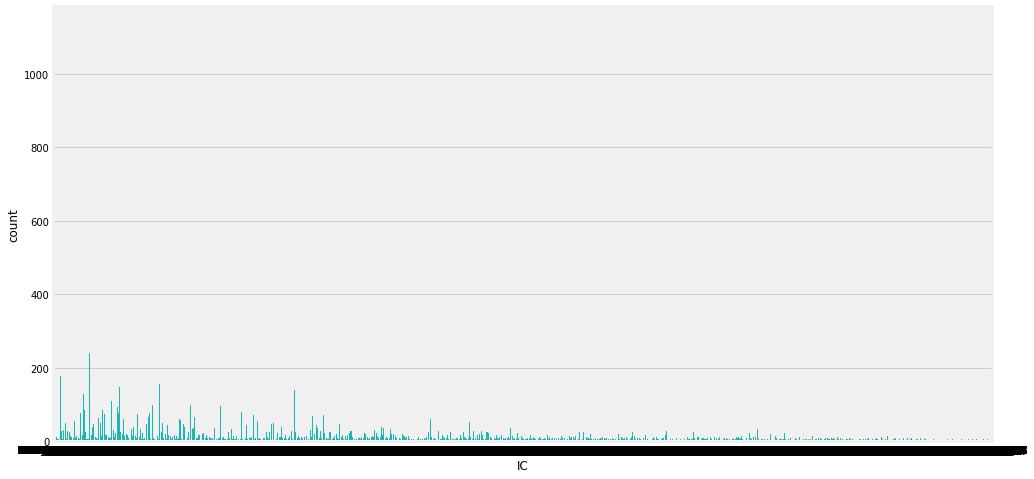

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.figure(figsize=(15,8))
sns.countplot('IC', data=df, color="darkturquoise")
plt.show()

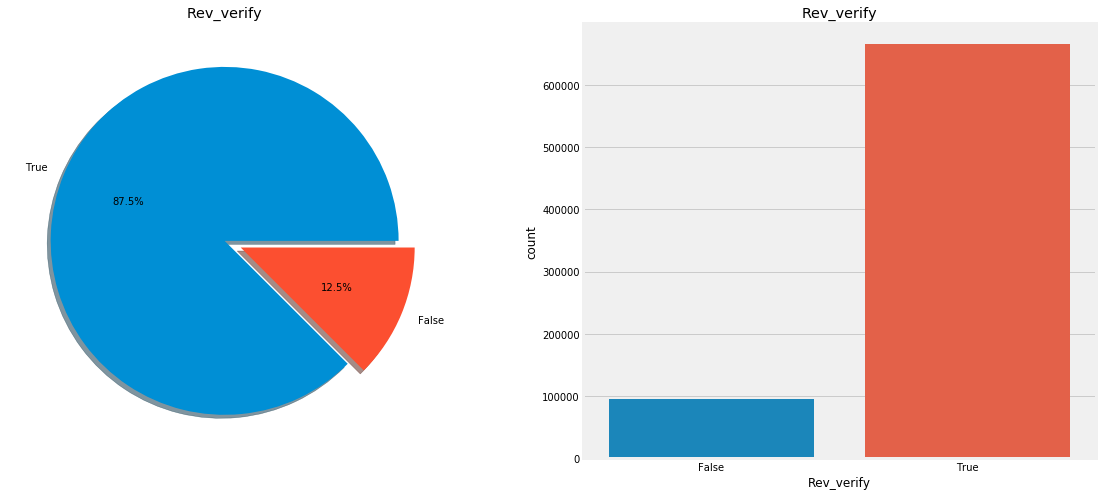

In [12]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Rev_verify'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Rev_verify')
ax[0].set_ylabel('')
sns.countplot('Rev_verify',data=df,ax=ax[1])
ax[1].set_title('Rev_verify')
plt.show()

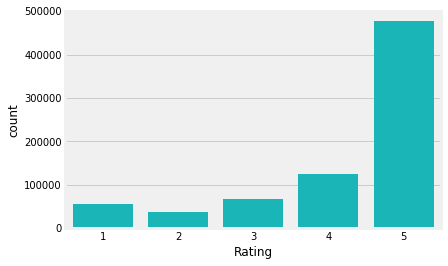

In [13]:
sns.countplot('Rating', data=df, color="darkturquoise")
plt.show()

In [11]:
df1=df

In [12]:
df1.dropna(subset=['Review'],inplace = True)

In [13]:
df1.isnull().sum()

Rating                   0
Rev_verify               0
Review_Date              0
IC                       0
Prod_meta           352384
Reviewer_Name           90
Review                   0
Rev_summ               318
Review_timestamp         0
Useful              697743
Prod_img            741786
dtype: int64

In [14]:
all_reviews = df1['Review']
all_sent_values = []
all_sentiments = []

In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [16]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings
import string
import nltk
warnings.filterwarnings('ignore')

In [17]:
df1['lower_case']=df1['Review'].apply(lambda x: ( x.lower()))
df1['lower_case']=(df1['lower_case'])

In [18]:
df1['cleanedtest'] = df1['lower_case'].str.replace(r'[^\w\d\s]', '')


# Replace whitespace between terms with a single space
df1['cleanedtest'] = df1['cleanedtest'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df1['cleanedtest'] = df1['cleanedtest'].str.replace(r'^\s+|\s+?$!@#$%^&*_-+=:;"''"', '')

In [19]:
stop_words = set(stopwords.words('english') )

df1['cleanedtest'] = df1['cleanedtest'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [24]:
df1['neg']=df1['Review'].apply(lambda x: analyser.polarity_scores(x)['neg'])

In [25]:
df1['neu']=df1['Review'].apply(lambda x: analyser.polarity_scores(x)['neu'])
df1['pos']=df1['Review'].apply(lambda x: analyser.polarity_scores(x)['pos'])
df1['compound']=df1['Review'].apply(lambda x: analyser.polarity_scores(x)['compound'])

In [73]:
df1

,Rating,Rev_verify,Review_Date,IC,Prod_meta,Reviewer_Name,Review,Rev_summ,Review_timestamp,Useful,Prod_img,lower_case,cleanedtest
0,5,True,"09 1, 2015",B009XD5TPQ,None,Sunny Zoeller,Bought it for my husband. He's very happy with it,He's very happy with,1441065600,None,None,bought it for my husband. he's very happy with it,bought husband hes happy
1,5,True,"01 9, 2016",B016MF3P3K,None,Denise Lesley,Great screen protector. Doesn't even seem as ...,Five Stars,1452297600,None,None,great screen protector. doesn't even seem as ...,great screen protector doesnt even seem though
10,1,True,"01 14, 2016",B00IJJCQBA,{'Color:': ' Black / Black'},Stephanie,To tight on my phone and the bottom piece was ...,One Star,1452729600,None,None,to tight on my phone and the bottom piece was ...,tight phone bottom piece missing
100,5,False,"06 21, 2017",B00NIJOGOG,{'Color:': ' Rose Gold [6+] CHOOSE CORRECT SIZ...,SG,"Very good and superior quality, looks great. M...",Very nice and good quality!!!,1498003200,None,None,"very good and superior quality, looks great. m...",good superior quality looks great wife using l...
1000,3,True,"06 10, 2015",B00MQYS97Y,None,Linda,"The charger is not working, however ! The comp...",Not happy,1433894400,None,None,"the charger is not working, however ! the comp...",charger working however company sending replac...
10000,5,False,"06 10, 2016",B01E6VQ7R8,None,D. Michael,"This charger has a solid appearance, and is ve...","This charger has a solid appearance, and is ve...",1465516800,None,None,"this charger has a solid appearance, and is ve...",charger solid appearance similarly styled appl...
100000,1,True,"04 8, 2018",B00NSBA86O,{'Color:': ' Y-White'},Leekyungjoo,not good,One Star,1523145600,None,None,not good,good
100001,5,False,"07 22, 2015",B00OHE8AOI,{'Color:': ' Black'},Amazon Customer,Works well if you need are charger of this sty...,Works well if you need are charger of this sty...,1437523200,None,None,works well if you need are charger of this sty...,works well need charger style 5 ports anker di...
100002,3,True,"04 23, 2015",B00S93RMLU,None,Michael Carr,An average plastic cover.,Three Stars,1429747200,None,None,an average plastic cover.,average plastic cover
100003,5,True,"03 13, 2017",B016OFYGXQ,{'Format:': ' Wireless Phone Accessory'},Leslie Bentley,Kids love this thing!,Five Stars,1489363200,None,None,kids love this thing!,kids love thing


In [33]:
reindexed_data=df1['Review']

In [28]:
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

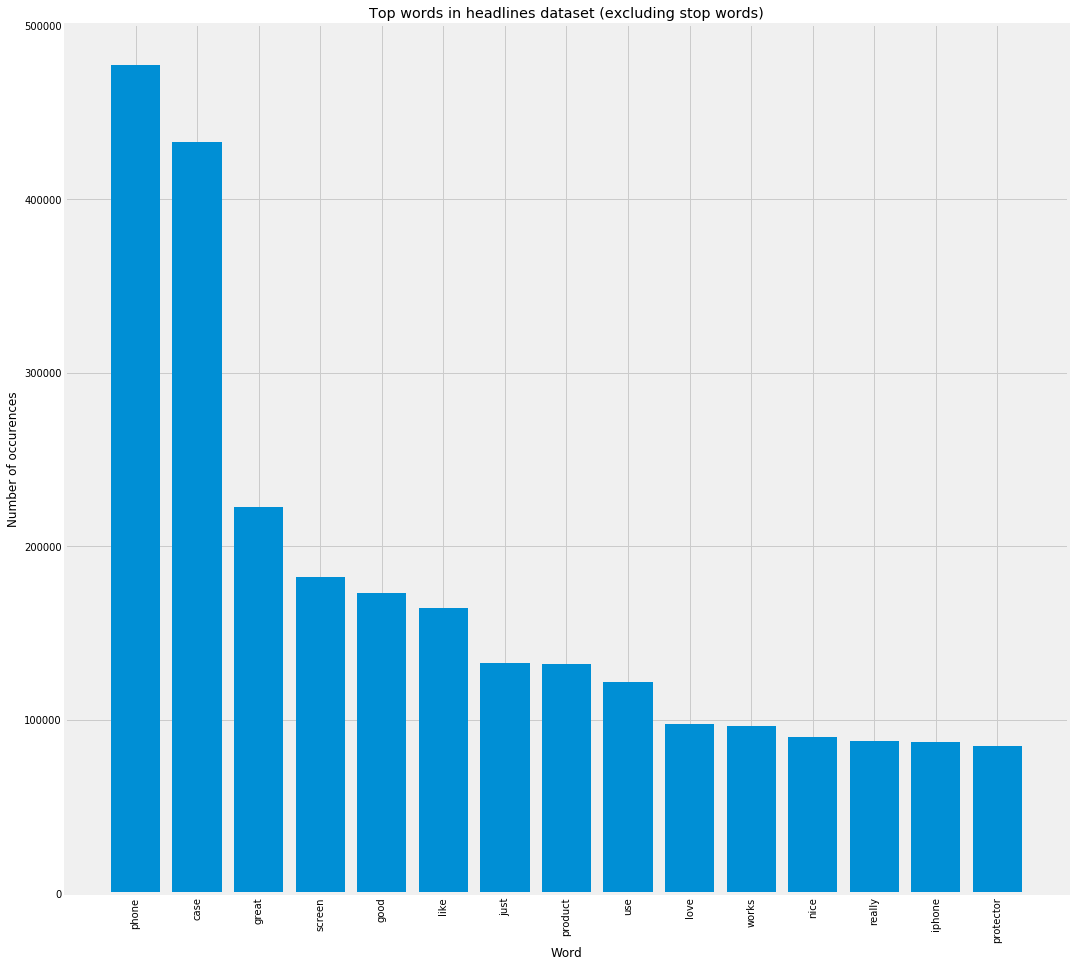

In [29]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=reindexed_data)

fig, ax = plt.subplots(figsize=(16,16))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in headlines dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()


In [30]:
reindexed_data.shape[0]

759920

In [74]:
sample = df['Review'][5]
print(sample)
print('Sentiment: ')
print(analyser.polarity_scores(sample)['compound'])

Love this case, very sturdy!
Sentiment: 
0.6696


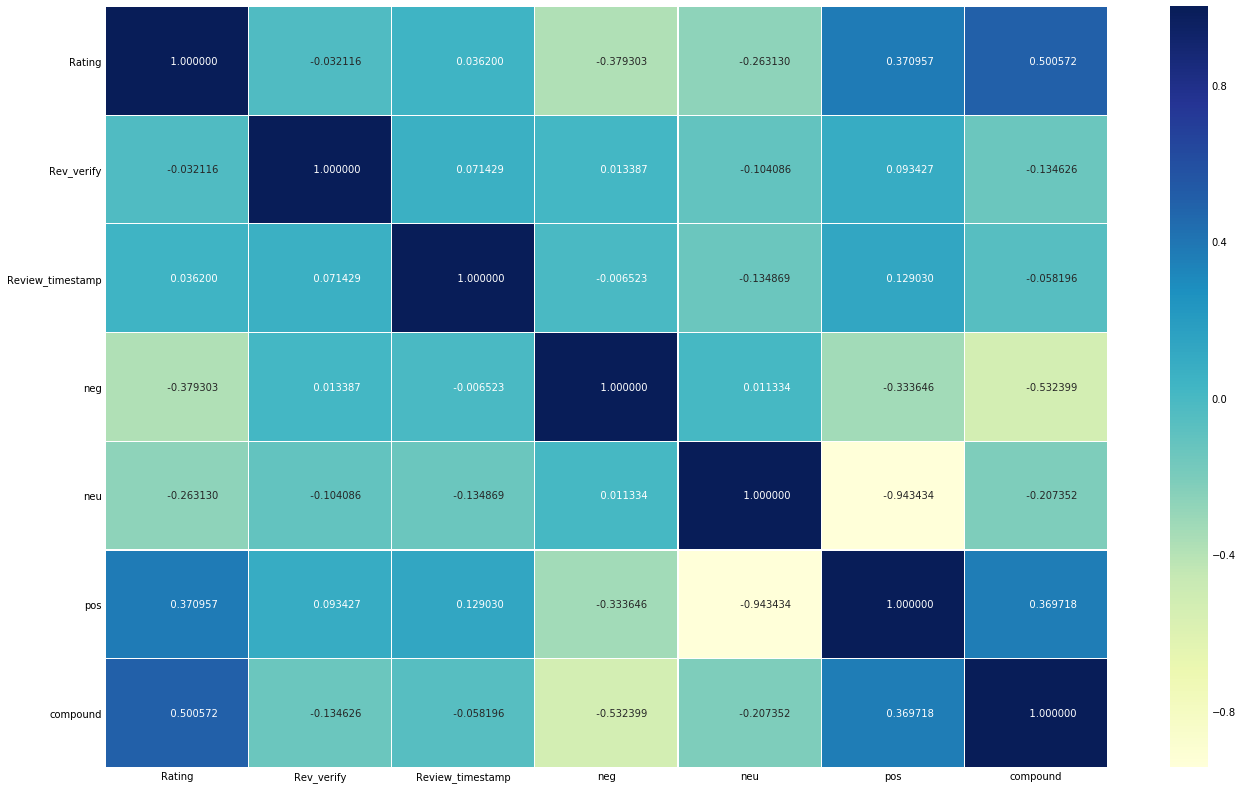

In [32]:
plt.figure(figsize=(20,14))
sns.heatmap(df1.corr(),linewidths=.1,fmt="19f",cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [26]:
x

<function str.count>

In [20]:
x=df1.IC.unique()


In [25]:
for i in x:
    i.count

In [40]:
df2=df1.head(50000)

In [41]:
from sklearn.model_selection import train_test_split
vect1 = CountVectorizer(ngram_range=(1,1))


X = df2.loc[:,('cleanedtest')]

features = vect1.fit_transform(X)

X = features
y = df2['Rating']
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)


In [42]:
#model formation
accuracy_score1=[]

naive = MultinomialNB()
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
svm = SVC(random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 2)
model = LogisticRegression()
z=[svm]
for i in z:
    i.fit(X_train,Y_train)
    y_pred = i.predict(x_test)
    print ('Final score {} = >' .format( i ) , accuracy_score(y_test,y_pred))
    print(classification_report(y_test, y_pred))
    accuracy_score1.append(accuracy_score(y_test,y_pred))

Final score SVC(random_state=1) = > 0.66752
              precision    recall  f1-score   support

           1       0.60      0.42      0.50       923
           2       0.28      0.01      0.02       639
           3       0.42      0.12      0.19      1052
           4       0.44      0.07      0.11      2058
           5       0.68      0.98      0.81      7828

    accuracy                           0.67     12500
   macro avg       0.49      0.32      0.33     12500
weighted avg       0.60      0.67      0.58     12500



In [45]:
tf_vec = TfidfVectorizer()
#vect1 = CountVectorizer(ngram_range=(1,1))


X = df2.loc[:,('cleanedtest')]

features = tf_vec.fit_transform(X)

X = features
y = df2['Rating']
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)


In [ ]:
accuracy_score1=[]
naive = MultinomialNB()
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
svm = SVC(random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 2)
model = LogisticRegression()
z=[svm,knn,model,rf,naive]
for i in z:
    i.fit(X_train,Y_train)
    y_pred = i.predict(x_test)
    print('final score {} = >' .format(i),accuracy_score(y_test,y_pred))
    print(classification_report(y_test, y_pred))
    accuracy_score1.append(accuracy_score(y_test,y_pred))
    

In [64]:
dfn=df['']

In [65]:
newdf.head()

,Rating,Rev_verify,Review_Date,IC,Prod_meta,Reviewer_Name,Review,Rev_summ,Review_timestamp,Useful,Prod_img


In [ ]:
tf_vec = TfidfVectorizer()
#vect1 = CountVectorizer(ngram_range=(1,1))


X = df1.loc[:,('cleanedtest')]

features = tf_vec.fit_transform(X)

X = features
y = df1['Rating']
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)
accuracy_score1=[]
naive = MultinomialNB()
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
svm = SVC(random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 2)
model = LogisticRegression()
z=[svm,model]
for i in z:
    i.fit(X_train,Y_train)
    y_pred = i.predict(x_test)
    print('final score {} = >' .format(i),accuracy_score(y_test,y_pred))
    print(classification_report(y_test, y_pred))
    accuracy_score1.append(accuracy_score(y_test,y_pred))
    

In [55]:
df1

,Rating,Rev_verify,Review_Date,IC,Prod_meta,Reviewer_Name,Review,Rev_summ,Review_timestamp,Useful,Prod_img,lower_case,cleanedtest
0,5,True,"09 1, 2015",B009XD5TPQ,None,Sunny Zoeller,Bought it for my husband. He's very happy with it,He's very happy with,1441065600,None,None,bought it for my husband. he's very happy with it,bought husband hes happy
1,5,True,"01 9, 2016",B016MF3P3K,None,Denise Lesley,Great screen protector. Doesn't even seem as ...,Five Stars,1452297600,None,None,great screen protector. doesn't even seem as ...,great screen protector doesnt even seem though
10,1,True,"01 14, 2016",B00IJJCQBA,{'Color:': ' Black / Black'},Stephanie,To tight on my phone and the bottom piece was ...,One Star,1452729600,None,None,to tight on my phone and the bottom piece was ...,tight phone bottom piece missing
100,5,False,"06 21, 2017",B00NIJOGOG,{'Color:': ' Rose Gold [6+] CHOOSE CORRECT SIZ...,SG,"Very good and superior quality, looks great. M...",Very nice and good quality!!!,1498003200,None,None,"very good and superior quality, looks great. m...",good superior quality looks great wife using l...
1000,3,True,"06 10, 2015",B00MQYS97Y,None,Linda,"The charger is not working, however ! The comp...",Not happy,1433894400,None,None,"the charger is not working, however ! the comp...",charger working however company sending replac...
10000,5,False,"06 10, 2016",B01E6VQ7R8,None,D. Michael,"This charger has a solid appearance, and is ve...","This charger has a solid appearance, and is ve...",1465516800,None,None,"this charger has a solid appearance, and is ve...",charger solid appearance similarly styled appl...
100000,1,True,"04 8, 2018",B00NSBA86O,{'Color:': ' Y-White'},Leekyungjoo,not good,One Star,1523145600,None,None,not good,good
100001,5,False,"07 22, 2015",B00OHE8AOI,{'Color:': ' Black'},Amazon Customer,Works well if you need are charger of this sty...,Works well if you need are charger of this sty...,1437523200,None,None,works well if you need are charger of this sty...,works well need charger style 5 ports anker di...
100002,3,True,"04 23, 2015",B00S93RMLU,None,Michael Carr,An average plastic cover.,Three Stars,1429747200,None,None,an average plastic cover.,average plastic cover
100003,5,True,"03 13, 2017",B016OFYGXQ,{'Format:': ' Wireless Phone Accessory'},Leslie Bentley,Kids love this thing!,Five Stars,1489363200,None,None,kids love this thing!,kids love thing
